In [1]:
import numpy as np
from scipy.sparse import csc_matrix
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

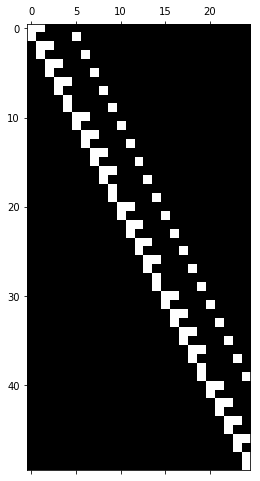

In [7]:
def buildM(normales):
    n_rows, n_cols = normales.shape[0], normales.shape[1]
    n = normales.shape[0] * normales.shape[1]
    M = np.zeros((2*n, n), dtype=np.uint8)

    pixel = 0

    for i in range(n_rows):
        for j in range(n_cols):
            # v1
            if j+1 == n_cols:
                #M[pixel][i*n_cols + j-1] = pixel
                pass
            else:
                M[pixel][i*n_cols + j+1] = 1
            M[pixel][i*n_cols + j] = 1

            # v2
            if i+1 == n_rows:
                #M[pixel+1][(i-1)*n_cols+j] = pixel
                pass
            else:
                M[pixel+1][(i+1)*n_cols + j] = 1
            M[pixel+1][i*n_cols+j] = 1

            pixel += 2
        
    return M

w, h = 5,5
normales = np.arange(w * h * 3).reshape(h, w, 3)
M = buildM(normales)
plt.matshow(M, cmap=plt.cm.gray)

In [8]:
M

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

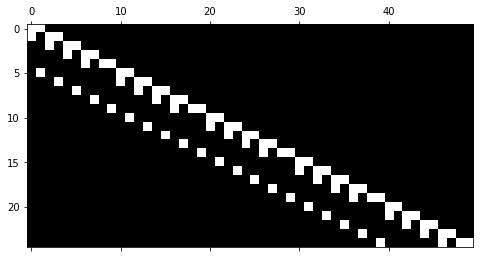

In [9]:
plt.matshow(M.T, cmap=plt.cm.gray)

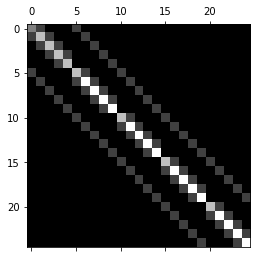

In [10]:
X = np.matmul(M.T, M)
plt.matshow(X, cmap=plt.cm.gray)